# Analyse exploratoire des données (EDA)
Ce notebook présente une analyse exploratoire du jeu de données d’arythmie
dans le cadre de la Phase 1 : Foundations & Data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
import os
os.getcwd()


'c:\\Users\\Hind Awity\\Documents\\project\\notebooks'

## Chargement des données
Le jeu de données est chargé à l’aide de la bibliothèque pandas.
Les valeurs manquantes sont représentées par le caractère « ? ».



In [25]:
df = pd.read_csv(
    r"C:\Users\Hind Awity\Documents\project\data\arrhythmia.data",
    header=None,
    na_values="?"
)


## Aperçu général des données
Une première exploration est réalisée afin de comprendre la taille,
la structure et le type des variables.


In [26]:
df.shape

(452, 280)

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [28]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Analyse des valeurs manquantes
Cette étape permet d’identifier les variables contenant des valeurs manquantes.


In [29]:
df.isna().sum().sort_values(ascending=False).head(10)


13     376
11      22
10       8
12       1
14       1
192      0
191      0
190      0
189      0
188      0
dtype: int64

## Traitement des valeurs manquantes
Les valeurs manquantes sont remplacées par la médiane de chaque variable
afin de conserver toutes les observations du jeu de données.


In [30]:
df_clean = df.copy()

for col in df_clean.columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [31]:
df_clean.isna().sum().sum()


0

## Statistiques descriptives
Les statistiques descriptives permettent d’analyser la distribution
et la dispersion des variables numériques.


In [32]:
df_clean.describe()


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Analyse visuelle des distributions
Les histogrammes permettent d’observer la répartition des valeurs
pour certaines variables.


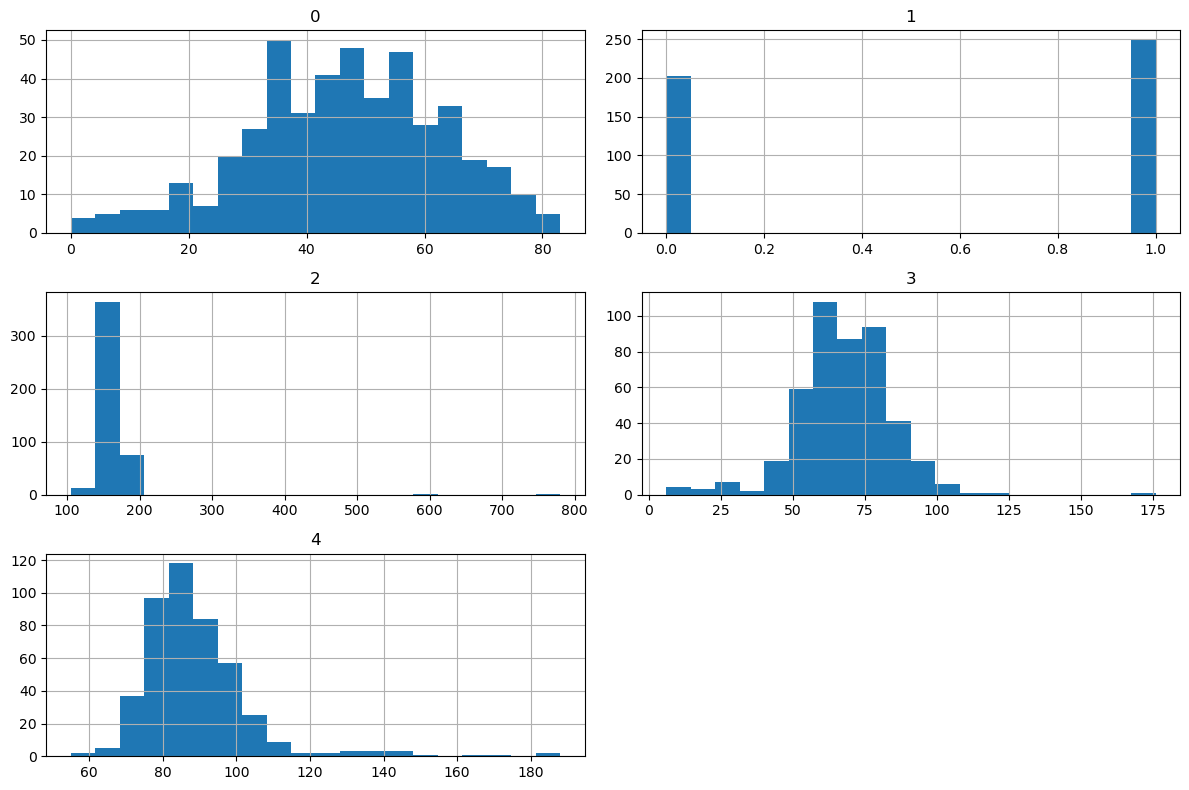

In [33]:
df_clean.iloc[:, :5].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

## Analyse des corrélations
La matrice de corrélation permet d’identifier les relations
entre les différentes variables.


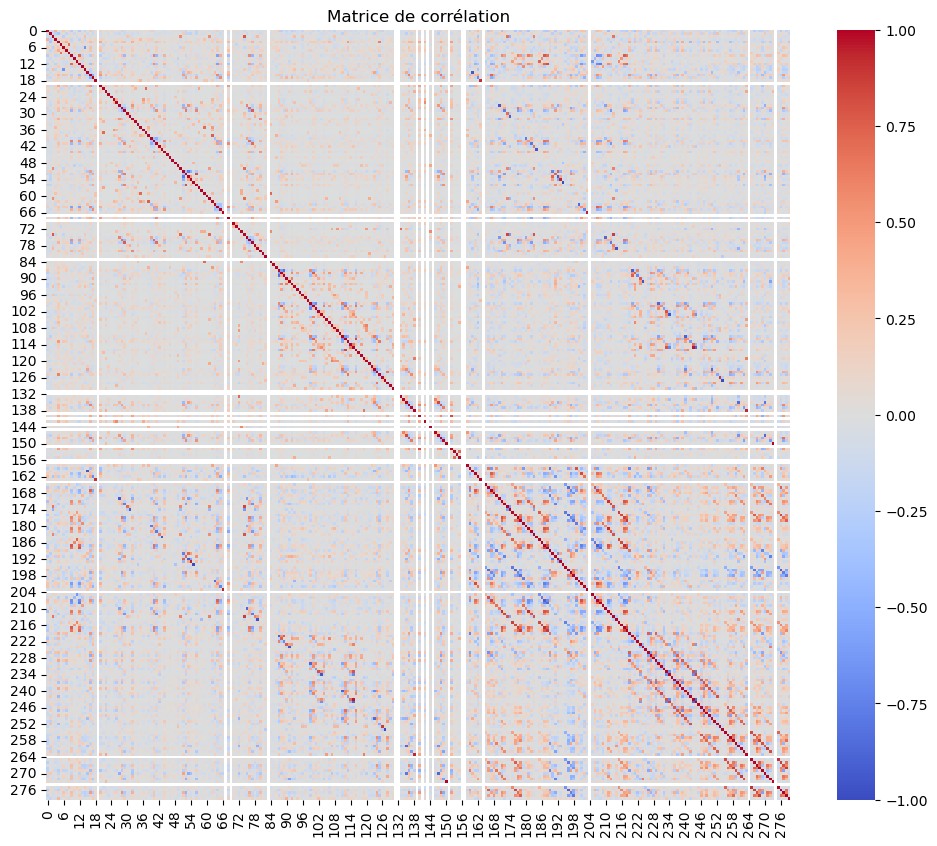

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()


## Analyse de la variable cible
La variable cible correspond aux différentes classes d’arythmie.
Il est important d’analyser sa distribution.


In [35]:
target_col = df_clean.columns[-1]
df_clean[target_col].value_counts()


279
1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: count, dtype: int64

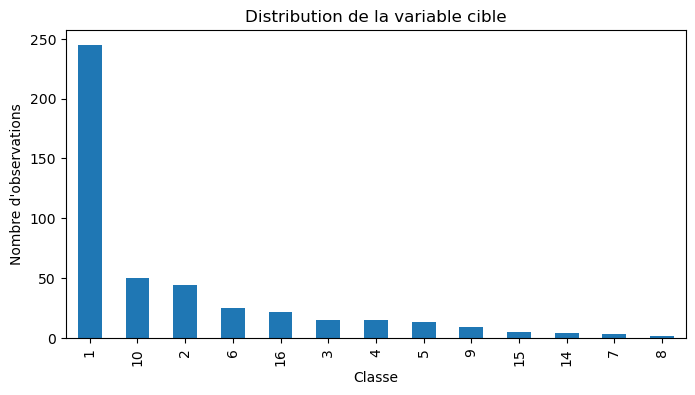

In [36]:
df_clean[target_col].value_counts().plot(kind="bar", figsize=(8,4))
plt.xlabel("Classe")
plt.ylabel("Nombre d'observations")
plt.title("Distribution de la variable cible")
plt.show()